In [7]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
crash=pd.read_csv('Crash_Data.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_11024\1123195828.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  crash=pd.read_csv('Crash_Data.csv')


In [9]:
crash

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [10]:
crash['Speed Limit']

0        NaN
1        110
2        NaN
3        NaN
4        NaN
        ... 
52838     60
52839    110
52840    110
52841    110
52842     60
Name: Speed Limit, Length: 52843, dtype: object

In [11]:
crash['Speed Limit']=crash['Speed Limit'].fillna(0)
crash['Speed Limit']=crash['Speed Limit'].replace({'Unspecified':0,'<40':40}).astype(int)

In [12]:
dow=crash.groupby('Day of week')['Day of week'].count()

In [13]:
i=dow.index
j=dow.values

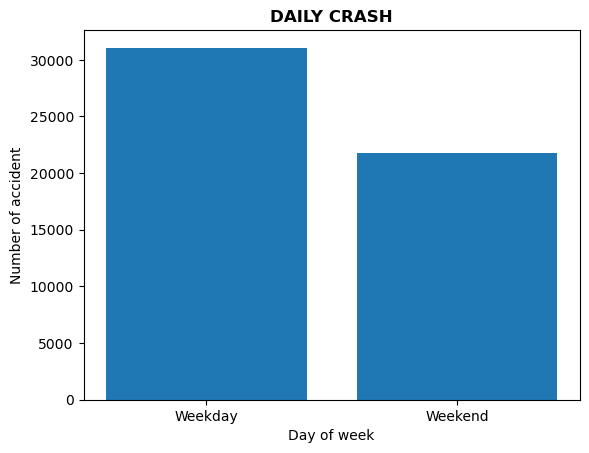

In [14]:
plt.bar(i,j)
plt.title('DAILY CRASH',fontweight='bold')
plt.xlabel('Day of week')
plt.ylabel('Number of accident')
plt.show()

In [15]:
avgspeed=crash.groupby('Road User')['Speed Limit'].mean()

In [16]:
roadu=avgspeed.index
spl=avgspeed.values

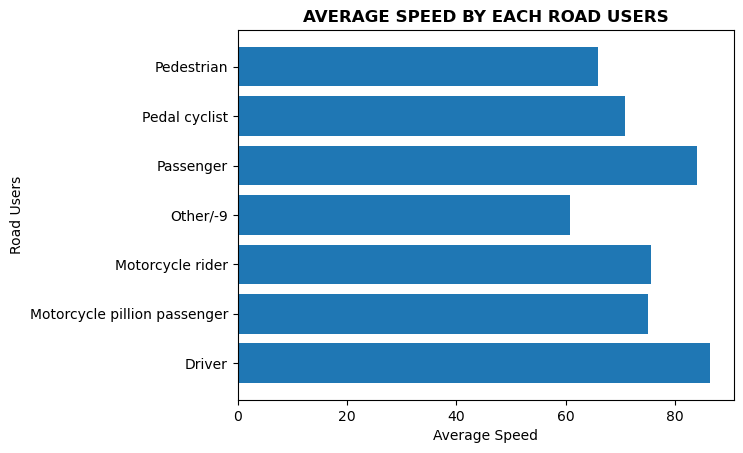

In [17]:
plt.barh(roadu,spl)
plt.title('AVERAGE SPEED BY EACH ROAD USERS',fontweight='bold')
plt.xlabel('Average Speed')
plt.ylabel('Road Users')
plt.show()

In [18]:
road=crash.groupby('Road User')['Road User'].count()

In [19]:
accu=road.index
accr=road.values

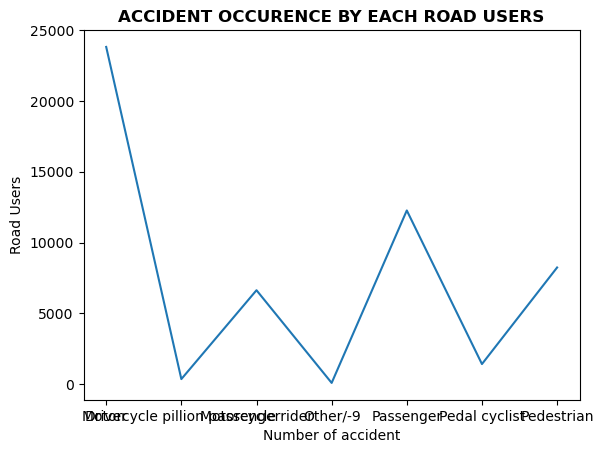

In [20]:
plt.plot(accu,accr)
plt.title('ACCIDENT OCCURENCE BY EACH ROAD USERS',fontweight='bold')
plt.xlabel('Number of accident')
plt.ylabel('Road Users')
plt.show()

In [21]:
gender=crash.groupby('Gender')['Gender'].count()

In [22]:
gender

Gender
Female         15002
Male           37813
Unspecified        1
Name: Gender, dtype: int64

In [23]:
e=gender.index
f=gender.values

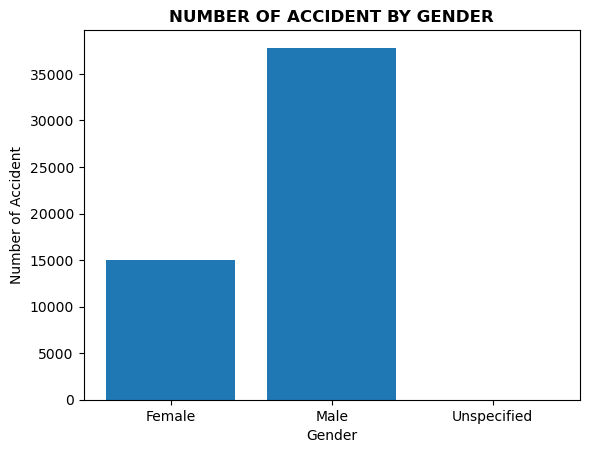

In [24]:
plt.bar(e,f)
plt.title('NUMBER OF ACCIDENT BY GENDER',fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Accident')
plt.show()

In [25]:

acc=crash.groupby('Dayweek')['Dayweek'].count()

In [26]:
a=acc.index
b=acc.values

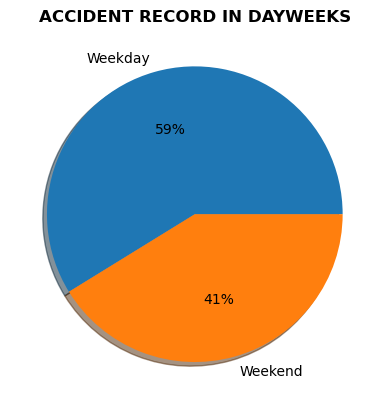

In [27]:
plt.pie(j,labels=i,autopct="%1.0f%%",shadow=True)
plt.title('ACCIDENT RECORD IN DAYWEEKS',fontweight='bold')
plt.show()

In [28]:
avg=crash.groupby('Road User')['Age'].mean()

In [30]:
avgr=avg.index
avga=avg.values

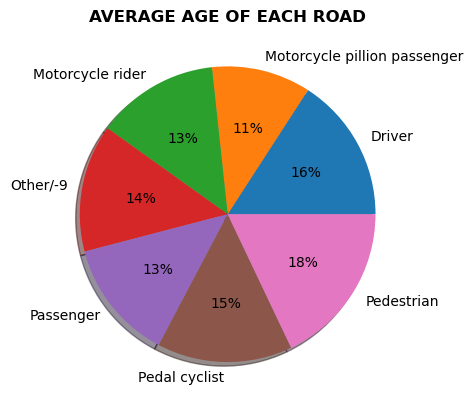

In [31]:
plt.pie(avga,labels=avgr,autopct="%1.0f%%",shadow=True)
plt.title('AVERAGE AGE OF EACH ROAD',fontweight='bold')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11024\4235051474.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


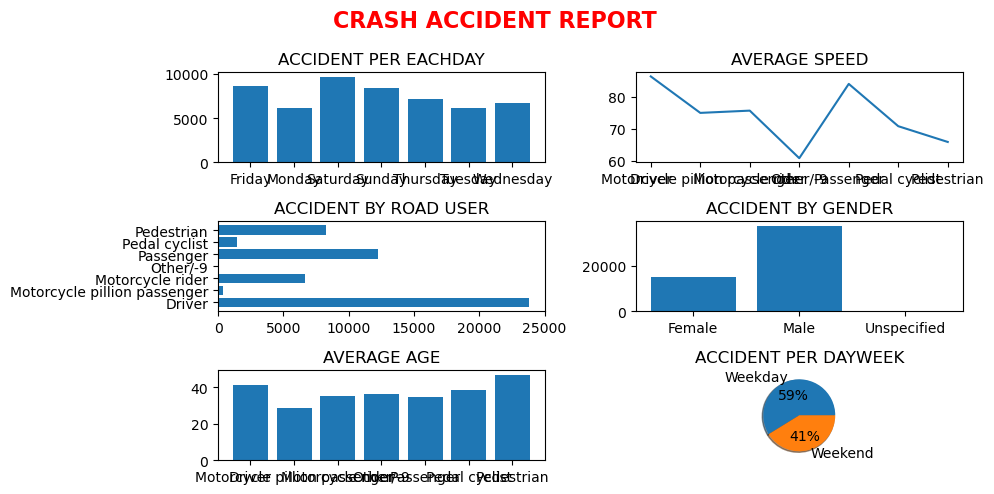

In [32]:
fig,CR=plt.subplots(nrows=3,ncols=2,figsize=(10,5))
fig.suptitle('CRASH ACCIDENT REPORT',fontsize=16,fontweight='bold',c='r')
plt.tight_layout()
CR[0,0].set(title='ACCIDENT PER EACHDAY')
CR[0,0].bar(a,b)
CR[0,1].set(title='AVERAGE SPEED')
CR[0,1].plot(roadu,spl)
CR[1,0].set(title='ACCIDENT BY ROAD USER')
CR[1,0].barh(accu,accr)
CR[1,1].set(title='ACCIDENT BY GENDER')
CR[1,1].bar(e,f)
CR[2,0].set(title='AVERAGE AGE')
CR[2,0].bar(avgr,avga)
CR[2,1].set(title='ACCIDENT PER DAYWEEK')
CR[2,1].pie(j,labels=i,autopct="%1.0f%%",shadow=True)
plt.tight_layout()
plt.savefig('CRASH DATA REPORT.png')
plt.show()